# Vizualização dos dados

In [1]:
import os
import numpy as np
!pip install nibabel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')
data_dir_1 = "/content/gdrive/MyDrive/IA901A_Projeto/data/raw/OASIS1/OAS1_0001_MR1/PROCESSED"
data_dir_2 = "gdrive/MyDrive/IA901A_Projeto/data/raw/OASIS2/OAS2_0001_MR1/RAW"


Mounted at /content/gdrive


In [ ]:
import nibabel as nib
img_filename1 = os.path.join(data_dir_1, 'OAS1_0001_MR1_mpr-1_anon.img')
img_filename2 = os.path.join(data_dir_2, 'mpr-1.nifti.hdr')

img1 = nib.load(img_filename1)
img2 = nib.load(img_filename2)

In [ ]:
img1.shape, img2.shape

((256, 256, 128, 1), (256, 256, 128, 1))

In [ ]:
header1 = img1.header
print(header1)

<class 'nibabel.spm2analyze.Spm2AnalyzeHeader'> object, endian='>'
sizeof_hdr     : 348
data_type      : b''
db_name        : b''
extents        : 16384
session_error  : 0
regular        : b'r'
hkey_un0       : b''
dim            : [  4 256 256 128   1   0   0   0]
vox_units      : b''
cal_units      : b''
unused1        : 0
datatype       : int16
bitpix         : 16
dim_un0        : 0
pixdim         : [0.   1.   1.   1.25 0.   0.   0.   0.  ]
vox_offset     : 0.0
scl_slope      : nan
scl_inter      : 0.0
funused3       : 0.0
cal_max        : 0.0
cal_min        : 0.0
compressed     : 0
verified       : 0
glmax          : 4095
glmin          : 0
descrip        : b'                                                                               '
aux_file       : b'                       '
orient         : b'\x02'
origin         : [8224 8224 8224 8224 8192]
generated      : b'         '
scannum        : b'         '
patient_id     : b'         '
exp_date       : b'         '
exp_time      

In [ ]:
header2 = img2.header
print(header2)

<class 'nibabel.nifti1.Nifti1PairHeader'> object, endian='>'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 57
dim             : [  4 256 256 128   1   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.    1.    1.    1.25  0.    0.    0.    0.  ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : unknown
quatern_b       : 0.5
quatern_c       : 0.5
quatern_d       : 0.5
qoffset_x       : 78.125
qoffset_y       : -127.5
qoffset_z       : -126.5
srow_x          

In [ ]:
img_data1 = img1.get_fdata()
img_data2 = img2.get_fdata()

In [ ]:
import matplotlib.pyplot as plt
def show_slices(slices):
   fig, axes = plt.subplots(1, len(slices))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

Text(0.5, 0.98, 'Center slices for image')

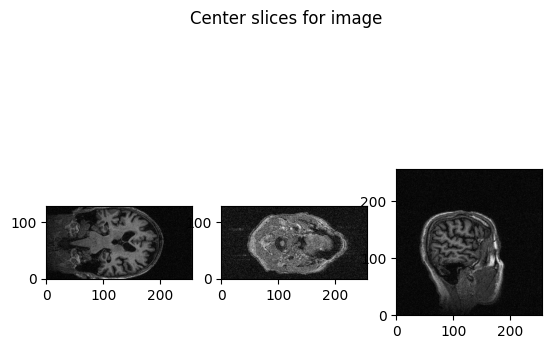

In [ ]:
slice_0 = img_data2[100, :, :,0]
slice_1 = img_data2[:, 30, :,0]
slice_2 = img_data2[:, :, 16,0]
show_slices([slice_0, slice_1, slice_2])
plt.suptitle("Center slices for image") 

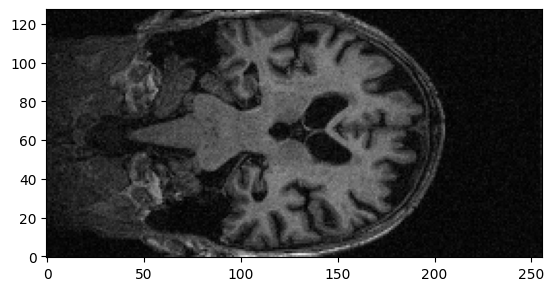

In [ ]:
plt.imshow(slice_0.T, cmap="gray", origin="lower")

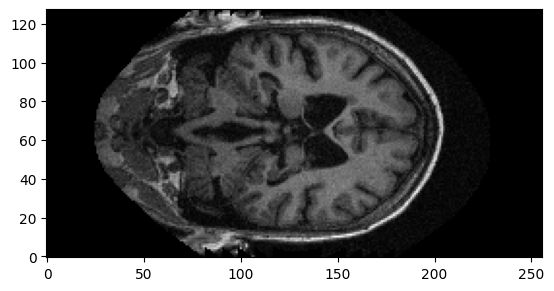

In [ ]:
slice_01 = img_data1[100, :, :,0]
plt.imshow(slice_01.T, cmap="gray", origin="lower")

In [ ]:
dir_processed = '/content/gdrive/MyDrive/IA901A_Projeto/data/raw/OASIS1/OAS1_0001_MR1/PROCESSED/MPRAGE/SUBJ_111'
img_filename_proc = os.path.join(dir_processed, 'OAS1_0001_MR1_mpr_n4_anon_sbj_111.img')
img_proc = nib.load(img_filename_proc)
img_proc.shape

(256, 256, 160, 1)

# Dataloader 

In [ ]:
# Imports

# import the needed libs

from __future__ import print_function, division

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
from torchsummary import summary
import matplotlib.pyplot as plt
import time
import os
import copy
import pandas as pd

plt.ion()   # interactive mode

In [ ]:
class ImageFolderWithPath(datasets.ImageFolder):
    def __getitem__(self, index):
        path, target = self.samples[index]
        img = self.loader(path)
        if self.transform is not None:
            img = self.transform(img)
        if self.target_transform is not None:
            target = self.target_transform(target)
        return img, target, path

In [ ]:
# Data paths and labels

data_dir = '/content/gdrive/MyDrive/IA901A_OASIS/OASIS1'
datainfo_dir = '/content/gdrive/MyDrive/IA901A_OASIS/OASIS1_datainfo.csv'

In [ ]:
datainfo = pd.read_csv(datainfo_dir)
datainfo = datainfo.iloc[:416]
(datainfo[['ID','CDR']])

In [ ]:
x = 'OAS1_0001_MR1'
filename = x + '_mpr_n4_anon_sbj_111.hdr'
filename

In [ ]:
#Data augmentation and normalization for training

data_transforms = {
    'train': transforms.Compose([
   
        transforms.ToTensor()
    ]),
    'val': transforms.Compose([
   
        transforms.ToTensor()
    ]),
    'test': transforms.Compose([
        
        transforms.ToTensor()
    ])
}

for x in datainfo['ID']:
  filename = x + '_mpr_n4_anon_sbj_111.img'
  img_filename = os.path.join(data_dir, x, 'PROCESSED/MPRAGE/SUBJ_111',filename)



In [ ]:
#image_datasets = {x: ImageFolderWithPath(os.path.join(data_dir, x, 'PROCESSED/MPRAGE/SUBJ_111'), data_transforms[x]) for x in ['train', 'val', 'test']}

#dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=24, shuffle=True, num_workers=6) for x in ['train', 'val', 'test']}

# Train 143 (56,5%), Val 62 (24,5%), Test 48 (19%)
#dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val', 'test']}
#class_names = image_datasets['train'].classes

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device

In [ ]:
/content/gdrive/MyDrive/IA901A_OASIS/OASIS1/OAS1_0001_MR1/PROCESSED/MPRAGE/SUBJ_111/OAS1_0001_MR1_mpr_n4_anon_sbj_111.img